In [1]:
from flask import Flask, render_template, url_for
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
# Load Data

bipolarsentiment = pd.read_csv(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil2\bipolarlabelled.csv")

In [3]:
bipolarsentiment

,Row_Number,Sentiment,Label
0,1,health ministry insurance companies cover ment...,Negative
1,2,black women graduated suffer anxiety ptsd schi...,Negative
2,3,self compassion may buffer depression anxiety ...,Negative
3,4,air now joined line south african depression a...,Negative
4,5,bipolar disorder may linked parkinson disease ...,Negative
5,6,grateful willingness open experience bipolar d...,Positive
6,7,can aid treatment obsessive compulsive disorde...,Negative
7,8,demi disorder taught love let bipolar disorder...,Negative
8,9,may mental health awareness perfect time intrs...,Positive
9,10,kush wax ideal depression bipolar disorder anx...,Negative


In [9]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(bipolarsentiment['Sentiment'], bipolarsentiment['Label'], test_size = 0.1, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [10]:
df_train90 = pd.DataFrame()
df_train90['Sentiment'] = train_X
df_train90['Label'] = train_Y

df_test10 = pd.DataFrame()
df_test10['Sentiment'] = test_X
df_test10['Label'] = test_Y

In [6]:
df_train90

,Sentiment,Label
280,severe case undiagnosed bipolar disorder cidal...,Negative
364,eating disorder want say eating disorder first...,Negative
299,disorder mental illness usually involves two p...,Negative
153,disorder may linked disease,Negative
219,congratulations well deserved award translational,Positive
385,let remove stigma around mental amp sexual hea...,Negative
60,getting solid block sleep can huge number some...,Negative
327,distinguishing prodromal stage bipolar disorde...,Negative
414,thought maybe suffered bipolar disorder found ...,Negative
6,can aid treatment obsessive compulsive disorde...,Negative


In [7]:
df_test10

,Sentiment,Label
357,depression predominant mental health problem w...,Negative
170,individuals pediatric larger late Positive pot...,Positive
224,bipolar disorder depression anxiety experienced,Negative
332,can form bipolar disorder depends long state,Negative
307,fuck can people believe headaches think depres...,Negative
306,actually logical may lead fact money mentally ...,Positive
150,much love give mania know inevitably crash bip...,Negative
10,bipolar disorder involves moods swing highs ma...,Negative
21,harry styles bipolar disorder s life mother gi...,Negative
261,don miss interview psychiatrist tomorrow,Negative


In [20]:
df_train90.to_csv(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\df_train90.csv")
df_test10.to_csv(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\df_test10.csv")

In [11]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_9010 = TfidfVectorizer(max_features = 5000)
tfidf_vect_9010.fit(bipolarsentiment['Sentiment'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['Sentiment'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['Sentiment'])

In [10]:
tfidf_vect_9010

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [61]:
#tambahkan hasil perhitungan tf idf kedalam DataFrame (GAGALLL)
train_X_tfidf_9010.toarray()
df_train_X_tfidf_9010 = pd.DataFrame()
df_train_X_tfidf_9010 = df_train_X_tfidf_9010.append(pd.Series(train_X_tfidf_9010), ignore_index=True)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [71]:
# print tf-idf values
df_train_X_tfidf_9010 = pd.DataFrame(train_X_tfidf_9010, index=cv.get_feature_names())

TypeError: 'TfidfVectorizer' object is not iterable

In [66]:
print(df_train_X_tfidf_9010)

                                                     0
0      (0, 91)\t0.3157196042124816\n  (0, 139)\t0.0...
1      (0, 325)\t0.3195496808333752\n  (0, 341)\t0....
2      (0, 341)\t0.068132297849698\n  (0, 422)\t0.5...
3      (0, 339)\t0.5542280996290884\n  (0, 341)\t0....
4      (0, 107)\t0.41587111418094547\n  (0, 252)\t0...
5      (0, 58)\t0.19099512412294672\n  (0, 84)\t0.2...
6      (0, 139)\t0.07467053706287956\n  (0, 144)\t0...
7      (0, 27)\t0.37552221776481376\n  (0, 139)\t0....
8      (0, 139)\t0.08495483133857962\n  (0, 325)\t0...
9      (0, 38)\t0.37243032230827117\n  (0, 93)\t0.3...
10     (0, 23)\t0.31211057964993566\n  (0, 71)\t0.2...
11     (0, 139)\t0.06511757262922276\n  (0, 293)\t0...
12     (0, 139)\t0.08465014586222289\n  (0, 339)\t0...
13     (0, 133)\t0.6937082577517686\n  (0, 139)\t0....
14     (0, 84)\t0.27196901432175624\n  (0, 226)\t0....
15     (0, 139)\t0.07489188864412448\n  (0, 184)\t0...
16     (0, 416)\t0.2520645364268241\n  (0, 446)\t0....
17     (0,

In [75]:
# TAUAH BODO AMAD

# get the first vector out (for the first document)
first_train_X_tfidf_9010 = train_X_tfidf_9010[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_train_X_tfidf_9010.T.todense(), index=train_X_tfidf_9010, columns=["tf-idf"])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [23]:
# Save tfidf_vect to pickle

import pickle

with open(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\tfidf_vect_9010.pkl", 'wb') as handle:
                    pickle.dump(tfidf_vect_9010, handle)

In [2]:
# To Load pickle

import pickle

tfidf_vect_9010 = pickle.load(open(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\tfidf_vect_9010.pkl", "rb" ) )

In [62]:
print(train_X_tfidf_9010)

  (0, 91)	0.3157196042124816
  (0, 139)	0.07351687174159226
  (0, 182)	0.3157196042124816
  (0, 204)	0.36908203699777425
  (0, 341)	0.07225666143189408
  (0, 439)	0.34546878431982947
  (0, 562)	0.269801860604565
  (0, 934)	0.28834779284081113
  (0, 1113)	0.28148840956340315
  (0, 1251)	0.3157196042124816
  (0, 1265)	0.2517392294560552
  (0, 1313)	0.36908203699777425
  (1, 325)	0.3195496808333752
  (1, 341)	0.1513567178167793
  (1, 369)	0.6613408659775272
  (1, 453)	0.34428113362600604
  (1, 980)	0.34428113362600604
  (1, 1083)	0.3306704329887636
  (1, 1335)	0.3020024358254782
  (2, 341)	0.068132297849698
  (2, 422)	0.5753733126975051
  (2, 570)	0.27922173521371874
  (2, 601)	0.23049699668539686
  (2, 642)	0.27922173521371874
  (2, 733)	0.28768665634875257
  :	:
  (370, 341)	0.06718555869380358
  (370, 472)	0.3431791943904727
  (370, 487)	0.3212231623471017
  (370, 588)	0.6863583887809453
  (370, 750)	0.2617330456123137
  (370, 1024)	0.3212231623471017
  (371, 139)	0.11029035905644925
 

In [12]:
print(test_X_tfidf_9010)

  (0, 1366)	0.4124432085224046
  (0, 1090)	0.2563896104885957
  (0, 966)	0.38605578046613065
  (0, 950)	0.4124432085224046
  (0, 780)	0.22255642483142266
  (0, 555)	0.24807029070878334
  (0, 469)	0.4124432085224046
  (0, 341)	0.08074565080572371
  (0, 311)	0.19330159884718695
  (0, 139)	0.08215391545000945
  (0, 71)	0.2243395337740834
  (0, 58)	0.2507269618303573
  (1, 944)	0.3045996750078388
  (1, 939)	0.32012444417074776
  (1, 905)	0.32012444417074776
  (1, 681)	0.32012444417074776
  (1, 679)	0.32012444417074776
  (1, 618)	0.292557728511762
  (1, 554)	0.34200537735975717
  (1, 543)	0.2743999971009958
  (1, 425)	0.32012444417074776
  (1, 235)	0.34200537735975717
  (2, 417)	0.7430677541171475
  (2, 341)	0.17006101114350128
  (2, 311)	0.40711871199975325
  :	:
  (38, 629)	0.5102674381316298
  (38, 383)	0.5102674381316298
  (38, 341)	0.09989709013397331
  (38, 323)	0.37300949494507285
  (38, 294)	0.43649220894054674
  (38, 139)	0.1016393702283054
  (39, 1379)	0.35856054942171556
  (39, 1

In [13]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(373, 1382)
(42, 1382)


In [14]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_9010.vocabulary_)

{'health': 555, 'ministry': 792, 'insurance': 632, 'companies': 233, 'cover': 271, 'mental': 780, 'illness': 601, 'policies': 935, 'amid': 57, 'rising': 1067, 'number': 848, 'cases': 183, 'black': 142, 'women': 1364, 'graduated': 523, 'suffer': 1193, 'anxiety': 71, 'ptsd': 992, 'schizophrenia': 1090, 'bipolar': 139, 'disorder': 341, 'depression': 311, 'adhd': 23, 'ocd': 859, 'autism': 105, 'self': 1101, 'compassion': 236, 'may': 761, 'buffer': 164, 'air': 39, 'now': 847, 'joined': 653, 'line': 705, 'south': 1148, 'african': 34, 'group': 531, 'unpacking': 1317, 'linked': 707, 'parkinson': 893, 'disease': 339, 'people': 907, 'hospitalized': 578, 'one': 869, 'two': 1308, 'times': 1262, 'per': 908, 'year': 1376, 'grateful': 525, 'willingness': 1358, 'open': 873, 'experience': 416, 'can': 175, 'aid': 38, 'treatment': 1289, 'obsessive': 852, 'compulsive': 241, 'disorders': 343, 'tourette': 1276, 'syndrome': 1216, 'asperge': 93, 'demi': 305, 'taught': 1230, 'love': 728, 'let': 693, 'define': 

In [12]:
# Proses Pelatihan
''' awalnya begini ya

from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_a_tfidf,train_b)

trus diganti jadi begini'''

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_9010,train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM_9010 = model.predict(test_X_tfidf_9010)
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['Sentiment'] = test_X
test_prediction_9010['Label'] = predictions_SVM_9010
SVM_accuracy_9010 = accuracy_score(predictions_SVM_9010, test_Y)*100
SVM_accuracy_9010 = round(SVM_accuracy_9010,1)

In [17]:
test_prediction_9010

,Sentiment,Label
357,depression predominant mental health problem w...,Negative
170,individuals pediatric larger late Positive pot...,Positive
224,bipolar disorder depression anxiety experienced,Negative
332,can form bipolar disorder depends long state,Negative
307,fuck can people believe headaches think depres...,Negative
306,actually logical may lead fact money mentally ...,Negative
150,much love give mania know inevitably crash bip...,Negative
10,bipolar disorder involves moods swing highs ma...,Negative
21,harry styles bipolar disorder s life mother gi...,Negative
261,don miss interview psychiatrist tomorrow,Negative


In [21]:
test_prediction_9010.to_csv(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\test_prediction_9010.csv")

In [14]:
SVM_accuracy_9010

90.5

In [15]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM_9010))


Here is the classification report:
              precision    recall  f1-score   support

    Negative       0.90      1.00      0.95        36
    Positive       1.00      0.33      0.50         6

    accuracy                           0.90        42
   macro avg       0.95      0.67      0.72        42
weighted avg       0.91      0.90      0.88        42



### Bar and Pie Plot

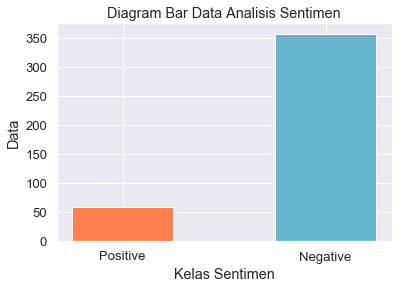

In [99]:
#Bar plot for bipolar reviews

labels = ['Positive','Negative']
Category1 = [58, 357]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen')
plt.savefig(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\plot\bar_data.png")
plt.show()

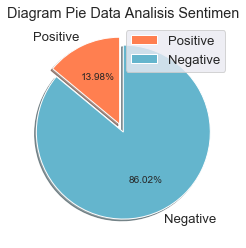

In [98]:
#pie chart for bipolar reviews

color = ['coral', 'c']
plt.pie(Category1, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie Data Analisis Sentimen')
plt.legend()
plt.savefig(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\plot\pie_data.png")
plt.show()

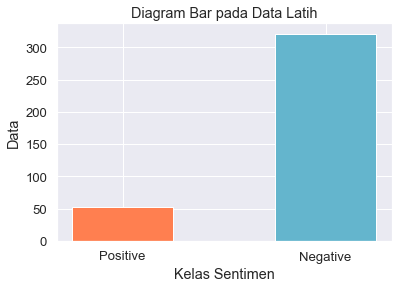

In [100]:
#Bar plot for Train Set

labels = ['Positive','Negative']
Category2 = [52, 321]
plt.bar(labels, Category2, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Latih')
plt.savefig(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\plot\bar_datalatih.png")
plt.show()

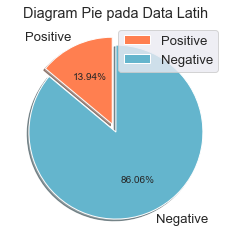

In [101]:
#pie chart for Train Set

color = ['coral', 'c']
plt.pie(Category2, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Data Latih')
plt.legend()
plt.savefig(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\plot\pie_datalatih.png")
plt.show()

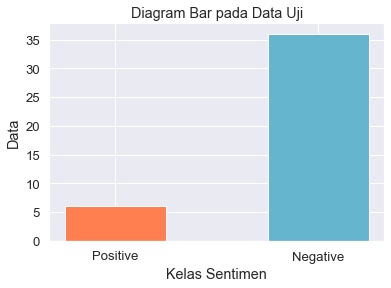

In [102]:
#Bar plot for Test Set

labels = ['Positive','Negative']
Category3 = [6, 36]
plt.bar(labels, Category3, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Data Uji')
plt.savefig(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\plot\bar_datauji.png")
plt.show()

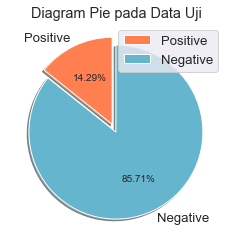

In [103]:
#pie chart for Test Set

color = ['coral', 'c']
plt.pie(Category3, labels=labels, colors=color, startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Data Uji')
plt.legend()
plt.savefig(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\plot\pie_datauji.png")
plt.show()

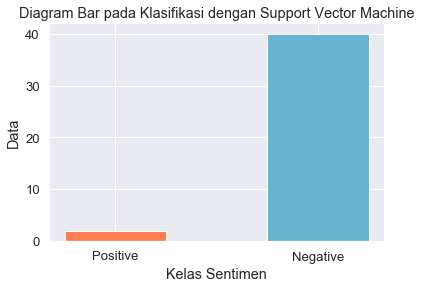

In [104]:
#Bar plot for Klasifikasi dengan SVM

labels = ['Positive','Negative']
Category4 = [2, 40]
plt.bar(labels, Category4, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar pada Klasifikasi dengan Support Vector Machine')
plt.savefig(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\plot\bar_svm.png")
plt.show()

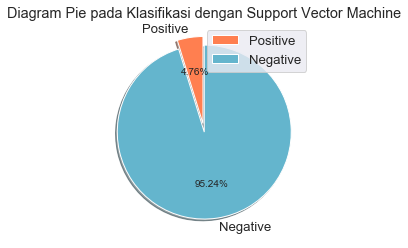

In [105]:
#pie chart for Klasifikasi dengan SVM

color = ['coral', 'c']
plt.pie(Category4, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0))
plt.title('Diagram Pie pada Klasifikasi dengan Support Vector Machine')
plt.legend()
plt.savefig(r"D:\Corinna Abigail\Kuliah\Tugas Kuliah\SEMESTER 8\SKRIPSWEET\hasil4\plot\pie_svm.png")
plt.show()

### Plot

In [4]:
# Select Positive and Negative Sentiment
y = bipolarsentiment.iloc[0:415, 2].values
y = np.where(y == 'Negative', -1, 1)

In [9]:
print(y)

[-1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1
 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [10]:
# extract sepal length and petal length
X = bipolarsentiment.iloc[0:415, [0, 2]].values

In [12]:
print(X)

[[1 'Negative']
 [2 'Negative']
 [3 'Negative']
 [4 'Negative']
 [5 'Negative']
 [6 'Positive']
 [7 'Negative']
 [8 'Negative']
 [9 'Positive']
 [10 'Negative']
 [11 'Negative']
 [12 'Negative']
 [13 'Positive']
 [14 'Negative']
 [15 'Negative']
 [16 'Negative']
 [17 'Negative']
 [18 'Negative']
 [19 'Positive']
 [20 'Negative']
 [21 'Negative']
 [22 'Negative']
 [23 'Positive']
 [24 'Positive']
 [25 'Negative']
 [26 'Negative']
 [27 'Negative']
 [28 'Positive']
 [29 'Negative']
 [30 'Negative']
 [31 'Negative']
 [32 'Negative']
 [33 'Negative']
 [34 'Negative']
 [35 'Positive']
 [36 'Negative']
 [37 'Negative']
 [38 'Negative']
 [39 'Negative']
 [40 'Negative']
 [41 'Negative']
 [42 'Negative']
 [43 'Negative']
 [44 'Negative']
 [45 'Negative']
 [46 'Negative']
 [47 'Negative']
 [48 'Negative']
 [49 'Positive']
 [50 'Negative']
 [51 'Negative']
 [52 'Negative']
 [53 'Negative']
 [54 'Negative']
 [55 'Negative']
 [56 'Negative']
 [57 'Negative']
 [58 'Negative']
 [59 'Negative']
 [60 '

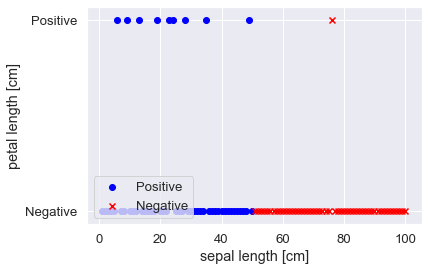

In [15]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],color='blue', marker='o', label='Positive')
plt.scatter(X[50:100, 0], X[50:100, 1],color='red', marker='x', label='Negative')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='lower left')
plt.show()
